## BDEO exercise 2: Ταξινόμηση χρονοσειρών πολυφασματικών δορυφορικών δεδομένων

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
from collections import Counter
from torch.utils.data import DataLoader
import utils.data_loader as data_loader
import utils.transforms as transforms
import models.pse as pse
import models.tranformer_model as tranformer
import models.train as train
import matplotlib.pyplot as plt
import os
import torchvision.transforms.functional as TF
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [3]:
# for GPU use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


### Data loader and Exploration

Number of labels before filtering: 14
Initial sample: 4999


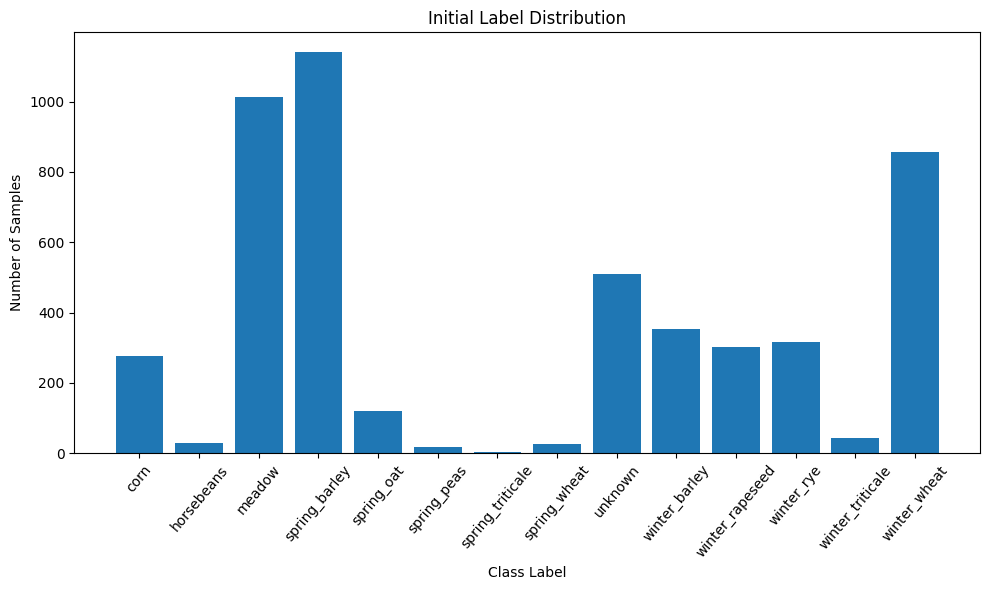

In [4]:
# Data Exploration
label_counts = data_loader.count_labels(
    "/home/ubuntu/bdeo_exercise_2/dataset/timematch_data/denmark/32VNH/2017/meta/labels.json"
)
print(f"Number of labels before filtering: {len(label_counts)}")

sorted_labels = sorted(label_counts.items(), key=lambda x: x[0])
labels, counts = zip(*sorted_labels)

print("Initial sample:", sum(label_counts.values()))
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.title("Initial Label Distribution")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()



Total sample: 4762
Label mapping: {'corn': 0, 'meadow': 1, 'spring_barley': 2, 'unknown': 3, 'winter_barley': 4, 'winter_rapeseed': 5, 'winter_rye': 6, 'winter_wheat': 7}
Number of labels after filtering:8


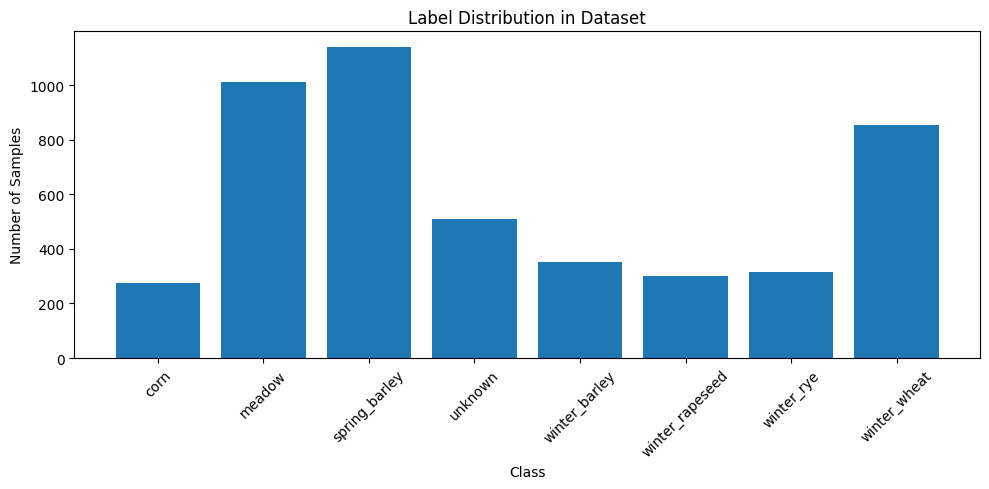

In [5]:
# Data loading
dataset = data_loader.PixelSetData(
    dataset_folder="/home/ubuntu/bdeo_exercise_2/dataset/timematch_data/denmark/32VNH/2017",
    transform=None,
    min_sample=200,
)


# Extract labels from dataset
labels = []
for i in range(len(dataset)):
    try:
        labels.append(dataset[i]["label"])
    except:
        continue

# Count how many times each label appears
label_counts = Counter(labels)

# Map index to class name
class_names = {v: k for k, v in dataset.class_to_idx.items()}

# Prepare sorted label indices and corresponding class names
sorted_labels = sorted(label_counts.keys())
counts = [label_counts[i] for i in sorted_labels]
names = [class_names[i] for i in sorted_labels]

all_labels = dataset.get_labels()
all_indices = list(range(len(dataset)))

print("Total sample:", len(all_indices))
print(f"Label mapping: {dataset.class_to_idx}")
print(f"Number of labels after filtering:{len(label_counts)}")
# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(names, counts)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Label Distribution in Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Model Training

Epoch 1/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.27it/s]


Epoch 1/100: Train Loss=1.4097, Acc=0.5011, Prec=0.5011, Rec=0.5011, F1=0.5011 | Val Loss=1.3287, Acc=0.5035, Prec=0.5035, Rec=0.5035, F1=0.5035
New best loss: 1.3287


Epoch 2/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.21it/s]


Epoch 2/100: Train Loss=1.0260, Acc=0.6360, Prec=0.6360, Rec=0.6360, F1=0.6360 | Val Loss=0.7952, Acc=0.6492, Prec=0.6492, Rec=0.6492, F1=0.6492
New best loss: 0.7952


Epoch 3/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.47it/s]


Epoch 3/100: Train Loss=0.8451, Acc=0.7156, Prec=0.7156, Rec=0.7156, F1=0.7156 | Val Loss=0.6644, Acc=0.7237, Prec=0.7237, Rec=0.7237, F1=0.7237
New best loss: 0.6644


Epoch 4/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.54it/s]


Epoch 4/100: Train Loss=0.7267, Acc=0.7471, Prec=0.7471, Rec=0.7471, F1=0.7471 | Val Loss=0.5995, Acc=0.7524, Prec=0.7524, Rec=0.7524, F1=0.7524
New best loss: 0.5995


Epoch 5/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.51it/s]


Epoch 5/100: Train Loss=0.5962, Acc=0.7894, Prec=0.7894, Rec=0.7894, F1=0.7894 | Val Loss=0.5234, Acc=0.7959, Prec=0.7959, Rec=0.7959, F1=0.7959
New best loss: 0.5234


Epoch 6/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.47it/s]


Epoch 6/100: Train Loss=0.5970, Acc=0.7908, Prec=0.7908, Rec=0.7908, F1=0.7908 | Val Loss=0.4771, Acc=0.7952, Prec=0.7952, Rec=0.7952, F1=0.7952
New best loss: 0.4771


Epoch 7/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.53it/s]


Epoch 7/100: Train Loss=0.5333, Acc=0.8187, Prec=0.8187, Rec=0.8187, F1=0.8187 | Val Loss=0.4773, Acc=0.8213, Prec=0.8213, Rec=0.8213, F1=0.8213
 No improvement (1/5)


Epoch 8/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.52it/s]


Epoch 8/100: Train Loss=0.5099, Acc=0.8322, Prec=0.8322, Rec=0.8322, F1=0.8322 | Val Loss=0.4042, Acc=0.8391, Prec=0.8391, Rec=0.8391, F1=0.8391
New best loss: 0.4042


Epoch 9/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.50it/s]


Epoch 9/100: Train Loss=0.4951, Acc=0.8364, Prec=0.8364, Rec=0.8364, F1=0.8364 | Val Loss=0.4006, Acc=0.8427, Prec=0.8427, Rec=0.8427, F1=0.8427
New best loss: 0.4006


Epoch 10/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.51it/s]


Epoch 10/100: Train Loss=0.4982, Acc=0.8336, Prec=0.8336, Rec=0.8336, F1=0.8336 | Val Loss=0.3368, Acc=0.8449, Prec=0.8449, Rec=0.8449, F1=0.8449
New best loss: 0.3368


Epoch 11/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.54it/s]


Epoch 11/100: Train Loss=0.4910, Acc=0.8380, Prec=0.8380, Rec=0.8380, F1=0.8380 | Val Loss=0.3928, Acc=0.8462, Prec=0.8462, Rec=0.8462, F1=0.8462
 No improvement (1/5)


Epoch 12/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.52it/s]


Epoch 12/100: Train Loss=0.4293, Acc=0.8637, Prec=0.8637, Rec=0.8637, F1=0.8637 | Val Loss=0.3678, Acc=0.8680, Prec=0.8680, Rec=0.8680, F1=0.8680
 No improvement (2/5)


Epoch 13/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.57it/s]


Epoch 13/100: Train Loss=0.4261, Acc=0.8679, Prec=0.8679, Rec=0.8679, F1=0.8679 | Val Loss=0.3587, Acc=0.8718, Prec=0.8718, Rec=0.8718, F1=0.8718
 No improvement (3/5)


Epoch 14/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.49it/s]


Epoch 14/100: Train Loss=0.3645, Acc=0.8834, Prec=0.8834, Rec=0.8834, F1=0.8834 | Val Loss=0.3204, Acc=0.8861, Prec=0.8861, Rec=0.8861, F1=0.8861
New best loss: 0.3204


Epoch 15/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.45it/s]


Epoch 15/100: Train Loss=0.3334, Acc=0.8939, Prec=0.8939, Rec=0.8939, F1=0.8939 | Val Loss=0.3213, Acc=0.8965, Prec=0.8965, Rec=0.8965, F1=0.8965
 No improvement (1/5)


Epoch 16/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.47it/s]


Epoch 16/100: Train Loss=0.3183, Acc=0.9035, Prec=0.9035, Rec=0.9035, F1=0.9035 | Val Loss=0.2993, Acc=0.9049, Prec=0.9049, Rec=0.9049, F1=0.9049
New best loss: 0.2993


Epoch 17/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.50it/s]


Epoch 17/100: Train Loss=0.3056, Acc=0.9080, Prec=0.9080, Rec=0.9080, F1=0.9080 | Val Loss=0.3228, Acc=0.9053, Prec=0.9053, Rec=0.9053, F1=0.9053
 No improvement (1/5)


Epoch 18/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.49it/s]


Epoch 18/100: Train Loss=0.2859, Acc=0.9127, Prec=0.9127, Rec=0.9127, F1=0.9127 | Val Loss=0.2927, Acc=0.9142, Prec=0.9142, Rec=0.9142, F1=0.9142
New best loss: 0.2927


Epoch 19/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.52it/s]


Epoch 19/100: Train Loss=0.2949, Acc=0.9135, Prec=0.9135, Rec=0.9135, F1=0.9135 | Val Loss=0.2784, Acc=0.9153, Prec=0.9153, Rec=0.9153, F1=0.9153
New best loss: 0.2784


Epoch 20/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.43it/s]


Epoch 20/100: Train Loss=0.3001, Acc=0.9082, Prec=0.9082, Rec=0.9082, F1=0.9082 | Val Loss=0.2978, Acc=0.9084, Prec=0.9084, Rec=0.9084, F1=0.9084
 No improvement (1/5)


Epoch 21/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.50it/s]


Epoch 21/100: Train Loss=0.2897, Acc=0.9099, Prec=0.9099, Rec=0.9099, F1=0.9099 | Val Loss=0.3665, Acc=0.9051, Prec=0.9051, Rec=0.9051, F1=0.9051
 No improvement (2/5)


Epoch 22/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.47it/s]


Epoch 22/100: Train Loss=0.2912, Acc=0.9074, Prec=0.9074, Rec=0.9074, F1=0.9074 | Val Loss=0.2579, Acc=0.9104, Prec=0.9104, Rec=0.9104, F1=0.9104
New best loss: 0.2579


Epoch 23/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.49it/s]


Epoch 23/100: Train Loss=0.2817, Acc=0.9127, Prec=0.9127, Rec=0.9127, F1=0.9127 | Val Loss=0.2762, Acc=0.9144, Prec=0.9144, Rec=0.9144, F1=0.9144
 No improvement (1/5)


Epoch 24/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.50it/s]


Epoch 24/100: Train Loss=0.2959, Acc=0.9099, Prec=0.9099, Rec=0.9099, F1=0.9099 | Val Loss=0.2507, Acc=0.9122, Prec=0.9122, Rec=0.9122, F1=0.9122
New best loss: 0.2507


Epoch 25/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.50it/s]


Epoch 25/100: Train Loss=0.2752, Acc=0.9179, Prec=0.9179, Rec=0.9179, F1=0.9179 | Val Loss=0.2604, Acc=0.9179, Prec=0.9179, Rec=0.9179, F1=0.9179
 No improvement (1/5)


Epoch 26/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.47it/s]


Epoch 26/100: Train Loss=0.2536, Acc=0.9245, Prec=0.9245, Rec=0.9245, F1=0.9245 | Val Loss=0.2652, Acc=0.9237, Prec=0.9237, Rec=0.9237, F1=0.9237
 No improvement (2/5)


Epoch 27/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.49it/s]


Epoch 27/100: Train Loss=0.3178, Acc=0.9038, Prec=0.9038, Rec=0.9038, F1=0.9038 | Val Loss=0.2669, Acc=0.9093, Prec=0.9093, Rec=0.9093, F1=0.9093
 No improvement (3/5)


Epoch 28/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.45it/s]


Epoch 28/100: Train Loss=0.2283, Acc=0.9287, Prec=0.9287, Rec=0.9287, F1=0.9287 | Val Loss=0.2438, Acc=0.9289, Prec=0.9289, Rec=0.9289, F1=0.9289
New best loss: 0.2438


Epoch 29/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.48it/s]


Epoch 29/100: Train Loss=0.2071, Acc=0.9328, Prec=0.9328, Rec=0.9328, F1=0.9328 | Val Loss=0.2581, Acc=0.9312, Prec=0.9312, Rec=0.9312, F1=0.9312
 No improvement (1/5)


Epoch 30/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.50it/s]


Epoch 30/100: Train Loss=0.2253, Acc=0.9262, Prec=0.9262, Rec=0.9262, F1=0.9262 | Val Loss=0.2673, Acc=0.9245, Prec=0.9245, Rec=0.9245, F1=0.9245
 No improvement (2/5)


Epoch 31/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.51it/s]


Epoch 31/100: Train Loss=0.2152, Acc=0.9331, Prec=0.9331, Rec=0.9331, F1=0.9331 | Val Loss=0.2341, Acc=0.9340, Prec=0.9340, Rec=0.9340, F1=0.9340
New best loss: 0.2341


Epoch 32/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.47it/s]


Epoch 32/100: Train Loss=0.1968, Acc=0.9356, Prec=0.9356, Rec=0.9356, F1=0.9356 | Val Loss=0.2478, Acc=0.9340, Prec=0.9340, Rec=0.9340, F1=0.9340
 No improvement (1/5)


Epoch 33/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.53it/s]


Epoch 33/100: Train Loss=0.2069, Acc=0.9348, Prec=0.9348, Rec=0.9348, F1=0.9348 | Val Loss=0.2554, Acc=0.9323, Prec=0.9323, Rec=0.9323, F1=0.9323
 No improvement (2/5)


Epoch 34/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.53it/s]


Epoch 34/100: Train Loss=0.1951, Acc=0.9373, Prec=0.9373, Rec=0.9373, F1=0.9373 | Val Loss=0.2418, Acc=0.9338, Prec=0.9338, Rec=0.9338, F1=0.9338
 No improvement (3/5)


Epoch 35/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.35it/s]


Epoch 35/100: Train Loss=0.1832, Acc=0.9409, Prec=0.9409, Rec=0.9409, F1=0.9409 | Val Loss=0.2385, Acc=0.9393, Prec=0.9393, Rec=0.9393, F1=0.9393
 No improvement (4/5)


Epoch 36/100 [Val]: 100%|██████████| 58/58 [00:03<00:00, 15.57it/s]


Epoch 36/100: Train Loss=0.1761, Acc=0.9417, Prec=0.9417, Rec=0.9417, F1=0.9417 | Val Loss=0.2373, Acc=0.9398, Prec=0.9398, Rec=0.9398, F1=0.9398
 No improvement (5/5)
Early stopping triggered.


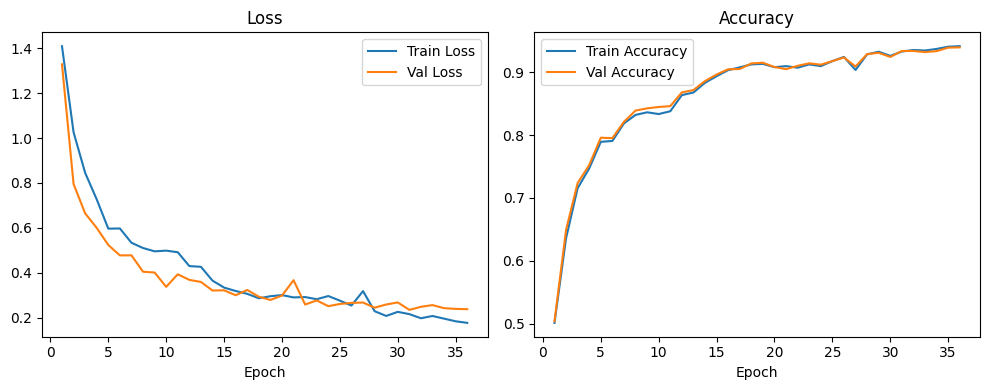

Accuracy: 0.9322

Classification Report:
                 precision    recall  f1-score   support

           corn     0.9545    0.9767    0.9655        43
         meadow     0.8919    0.8824    0.8871       187
  spring_barley     0.9636    0.9675    0.9655       246
        unknown     0.8163    0.7921    0.8040       101
  winter_barley     1.0000    0.9846    0.9922        65
winter_rapeseed     0.9464    1.0000    0.9725        53
     winter_rye     0.8800    0.9565    0.9167        69
   winter_wheat     0.9931    0.9600    0.9763       150

       accuracy                         0.9322       914
      macro avg     0.9307    0.9400    0.9350       914
   weighted avg     0.9323    0.9322    0.9320       914

Micro Avg  - Precision: 0.9322, Recall: 0.9322, F1: 0.9322
Weighted   - Precision: 0.9323, Recall: 0.9322, F1: 0.9320


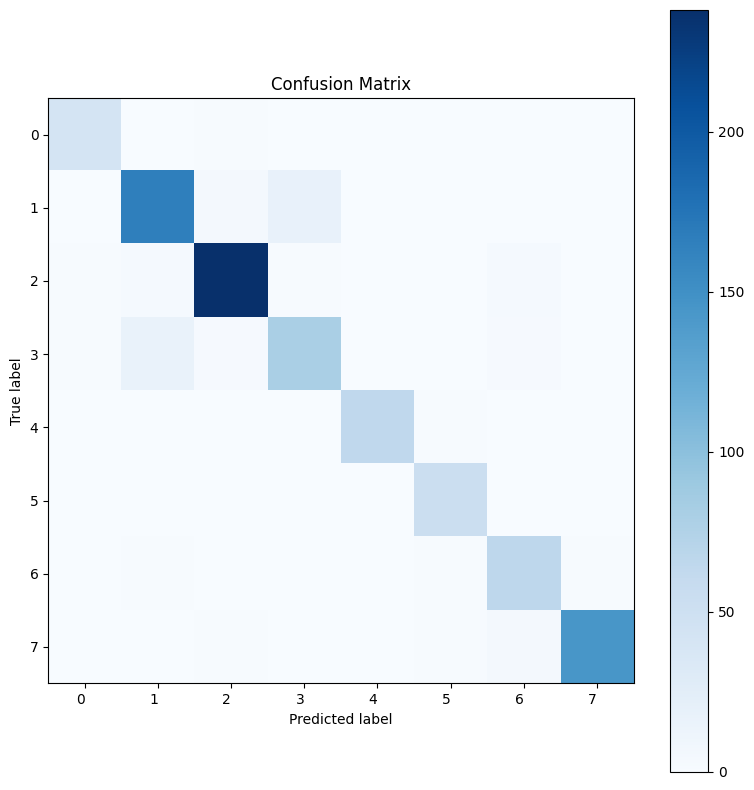

Epoch 1/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.65it/s]


Epoch 1/100: Train Loss=1.6607, Acc=0.4085, Prec=0.4085, Rec=0.4085, F1=0.4085 | Val Loss=1.4829, Acc=0.4230, Prec=0.4230, Rec=0.4230, F1=0.4230
New best loss: 1.4829


Epoch 2/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.64it/s]


Epoch 2/100: Train Loss=1.2979, Acc=0.5476, Prec=0.5476, Rec=0.5476, F1=0.5476 | Val Loss=1.0337, Acc=0.5602, Prec=0.5602, Rec=0.5602, F1=0.5602
New best loss: 1.0337


Epoch 3/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.70it/s]


Epoch 3/100: Train Loss=1.3106, Acc=0.5355, Prec=0.5355, Rec=0.5355, F1=0.5355 | Val Loss=1.2536, Acc=0.5437, Prec=0.5437, Rec=0.5437, F1=0.5437
 No improvement (1/5)


Epoch 4/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.62it/s]


Epoch 4/100: Train Loss=1.1724, Acc=0.5777, Prec=0.5777, Rec=0.5777, F1=0.5777 | Val Loss=0.9855, Acc=0.5880, Prec=0.5880, Rec=0.5880, F1=0.5880
New best loss: 0.9855


Epoch 5/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.61it/s]


Epoch 5/100: Train Loss=1.0348, Acc=0.6197, Prec=0.6197, Rec=0.6197, F1=0.6197 | Val Loss=0.8821, Acc=0.6253, Prec=0.6253, Rec=0.6253, F1=0.6253
New best loss: 0.8821


Epoch 6/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.65it/s]


Epoch 6/100: Train Loss=0.9433, Acc=0.6547, Prec=0.6547, Rec=0.6547, F1=0.6547 | Val Loss=0.7683, Acc=0.6684, Prec=0.6684, Rec=0.6684, F1=0.6684
New best loss: 0.7683


Epoch 7/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.66it/s]


Epoch 7/100: Train Loss=0.8848, Acc=0.6887, Prec=0.6887, Rec=0.6887, F1=0.6887 | Val Loss=0.7307, Acc=0.6964, Prec=0.6964, Rec=0.6964, F1=0.6964
New best loss: 0.7307


Epoch 8/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.64it/s]


Epoch 8/100: Train Loss=0.8155, Acc=0.7132, Prec=0.7132, Rec=0.7132, F1=0.7132 | Val Loss=0.6863, Acc=0.7222, Prec=0.7222, Rec=0.7222, F1=0.7222
New best loss: 0.6863


Epoch 9/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.65it/s]


Epoch 9/100: Train Loss=0.7812, Acc=0.7168, Prec=0.7168, Rec=0.7168, F1=0.7168 | Val Loss=0.5978, Acc=0.7297, Prec=0.7297, Rec=0.7297, F1=0.7297
New best loss: 0.5978


Epoch 10/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.60it/s]


Epoch 10/100: Train Loss=0.7016, Acc=0.7568, Prec=0.7568, Rec=0.7568, F1=0.7568 | Val Loss=0.6125, Acc=0.7646, Prec=0.7646, Rec=0.7646, F1=0.7646
 No improvement (1/5)


Epoch 11/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.66it/s]


Epoch 11/100: Train Loss=0.6360, Acc=0.7784, Prec=0.7784, Rec=0.7784, F1=0.7784 | Val Loss=0.5409, Acc=0.7875, Prec=0.7875, Rec=0.7875, F1=0.7875
New best loss: 0.5409


Epoch 12/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.63it/s]


Epoch 12/100: Train Loss=0.5922, Acc=0.7971, Prec=0.7971, Rec=0.7971, F1=0.7971 | Val Loss=0.4468, Acc=0.8054, Prec=0.8054, Rec=0.8054, F1=0.8054
New best loss: 0.4468


Epoch 13/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.67it/s]


Epoch 13/100: Train Loss=0.5603, Acc=0.8151, Prec=0.8151, Rec=0.8151, F1=0.8151 | Val Loss=0.5241, Acc=0.8169, Prec=0.8169, Rec=0.8169, F1=0.8169
 No improvement (1/5)


Epoch 14/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.66it/s]


Epoch 14/100: Train Loss=0.5500, Acc=0.8211, Prec=0.8211, Rec=0.8211, F1=0.8211 | Val Loss=0.4603, Acc=0.8255, Prec=0.8255, Rec=0.8255, F1=0.8255
 No improvement (2/5)


Epoch 15/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.60it/s]


Epoch 15/100: Train Loss=0.5166, Acc=0.8360, Prec=0.8360, Rec=0.8360, F1=0.8360 | Val Loss=0.4121, Acc=0.8380, Prec=0.8380, Rec=0.8380, F1=0.8380
New best loss: 0.4121


Epoch 16/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.62it/s]


Epoch 16/100: Train Loss=0.4991, Acc=0.8424, Prec=0.8424, Rec=0.8424, F1=0.8424 | Val Loss=0.4127, Acc=0.8453, Prec=0.8453, Rec=0.8453, F1=0.8453
 No improvement (1/5)


Epoch 17/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.67it/s]


Epoch 17/100: Train Loss=0.4799, Acc=0.8441, Prec=0.8441, Rec=0.8441, F1=0.8441 | Val Loss=0.5333, Acc=0.8442, Prec=0.8442, Rec=0.8442, F1=0.8442
 No improvement (2/5)


Epoch 18/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.63it/s]


Epoch 18/100: Train Loss=0.5051, Acc=0.8424, Prec=0.8424, Rec=0.8424, F1=0.8424 | Val Loss=0.4423, Acc=0.8455, Prec=0.8455, Rec=0.8455, F1=0.8455
 No improvement (3/5)


Epoch 19/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.64it/s]


Epoch 19/100: Train Loss=0.4016, Acc=0.8750, Prec=0.8750, Rec=0.8750, F1=0.8750 | Val Loss=0.3826, Acc=0.8784, Prec=0.8784, Rec=0.8784, F1=0.8784
New best loss: 0.3826


Epoch 20/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.59it/s]


Epoch 20/100: Train Loss=0.3846, Acc=0.8819, Prec=0.8819, Rec=0.8819, F1=0.8819 | Val Loss=0.3737, Acc=0.8806, Prec=0.8806, Rec=0.8806, F1=0.8806
New best loss: 0.3737


Epoch 21/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.61it/s]


Epoch 21/100: Train Loss=0.3690, Acc=0.8832, Prec=0.8832, Rec=0.8832, F1=0.8832 | Val Loss=0.3231, Acc=0.8837, Prec=0.8837, Rec=0.8837, F1=0.8837
New best loss: 0.3231


Epoch 22/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.57it/s]


Epoch 22/100: Train Loss=0.3768, Acc=0.8739, Prec=0.8739, Rec=0.8739, F1=0.8739 | Val Loss=0.3556, Acc=0.8767, Prec=0.8767, Rec=0.8767, F1=0.8767
 No improvement (1/5)


Epoch 23/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.60it/s]


Epoch 23/100: Train Loss=0.3459, Acc=0.8871, Prec=0.8871, Rec=0.8871, F1=0.8871 | Val Loss=0.3263, Acc=0.8886, Prec=0.8886, Rec=0.8886, F1=0.8886
 No improvement (2/5)


Epoch 24/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.61it/s]


Epoch 24/100: Train Loss=0.3406, Acc=0.8987, Prec=0.8987, Rec=0.8987, F1=0.8987 | Val Loss=0.3145, Acc=0.8976, Prec=0.8976, Rec=0.8976, F1=0.8976
New best loss: 0.3145


Epoch 25/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.59it/s]


Epoch 25/100: Train Loss=0.3208, Acc=0.8995, Prec=0.8995, Rec=0.8995, F1=0.8995 | Val Loss=0.3374, Acc=0.8981, Prec=0.8981, Rec=0.8981, F1=0.8981
 No improvement (1/5)


Epoch 26/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.62it/s]


Epoch 26/100: Train Loss=0.3315, Acc=0.8959, Prec=0.8959, Rec=0.8959, F1=0.8959 | Val Loss=0.3434, Acc=0.8970, Prec=0.8970, Rec=0.8970, F1=0.8970
 No improvement (2/5)


Epoch 27/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.64it/s]


Epoch 27/100: Train Loss=0.3265, Acc=0.8995, Prec=0.8995, Rec=0.8995, F1=0.8995 | Val Loss=0.3850, Acc=0.8976, Prec=0.8976, Rec=0.8976, F1=0.8976
 No improvement (3/5)


Epoch 28/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.60it/s]


Epoch 28/100: Train Loss=0.2973, Acc=0.9075, Prec=0.9075, Rec=0.9075, F1=0.9075 | Val Loss=0.3002, Acc=0.9078, Prec=0.9078, Rec=0.9078, F1=0.9078
New best loss: 0.3002


Epoch 29/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.59it/s]


Epoch 29/100: Train Loss=0.2759, Acc=0.9183, Prec=0.9183, Rec=0.9183, F1=0.9183 | Val Loss=0.3001, Acc=0.9162, Prec=0.9162, Rec=0.9162, F1=0.9162
 No improvement (1/5)


Epoch 30/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.73it/s]


Epoch 30/100: Train Loss=0.2652, Acc=0.9153, Prec=0.9153, Rec=0.9153, F1=0.9153 | Val Loss=0.2842, Acc=0.9148, Prec=0.9148, Rec=0.9148, F1=0.9148
New best loss: 0.2842


Epoch 31/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.65it/s]


Epoch 31/100: Train Loss=0.2715, Acc=0.9158, Prec=0.9158, Rec=0.9158, F1=0.9158 | Val Loss=0.2897, Acc=0.9148, Prec=0.9148, Rec=0.9148, F1=0.9148
 No improvement (1/5)


Epoch 32/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.64it/s]


Epoch 32/100: Train Loss=0.2696, Acc=0.9142, Prec=0.9142, Rec=0.9142, F1=0.9142 | Val Loss=0.2880, Acc=0.9137, Prec=0.9137, Rec=0.9137, F1=0.9137
 No improvement (2/5)


Epoch 33/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.62it/s]


Epoch 33/100: Train Loss=0.2719, Acc=0.9122, Prec=0.9122, Rec=0.9122, F1=0.9122 | Val Loss=0.2921, Acc=0.9120, Prec=0.9120, Rec=0.9120, F1=0.9120
 No improvement (3/5)


Epoch 34/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.67it/s]


Epoch 34/100: Train Loss=0.2489, Acc=0.9189, Prec=0.9189, Rec=0.9189, F1=0.9189 | Val Loss=0.2857, Acc=0.9181, Prec=0.9181, Rec=0.9181, F1=0.9181
 No improvement (4/5)


Epoch 35/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.69it/s]


Epoch 35/100: Train Loss=0.2384, Acc=0.9263, Prec=0.9263, Rec=0.9263, F1=0.9263 | Val Loss=0.2794, Acc=0.9241, Prec=0.9241, Rec=0.9241, F1=0.9241
New best loss: 0.2794


Epoch 36/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.61it/s]


Epoch 36/100: Train Loss=0.2461, Acc=0.9241, Prec=0.9241, Rec=0.9241, F1=0.9241 | Val Loss=0.2811, Acc=0.9223, Prec=0.9223, Rec=0.9223, F1=0.9223
 No improvement (1/5)


Epoch 37/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.62it/s]


Epoch 37/100: Train Loss=0.2447, Acc=0.9246, Prec=0.9246, Rec=0.9246, F1=0.9246 | Val Loss=0.2785, Acc=0.9217, Prec=0.9217, Rec=0.9217, F1=0.9217
 No improvement (2/5)


Epoch 38/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.64it/s]


Epoch 38/100: Train Loss=0.2332, Acc=0.9246, Prec=0.9246, Rec=0.9246, F1=0.9246 | Val Loss=0.2755, Acc=0.9219, Prec=0.9219, Rec=0.9219, F1=0.9219
New best loss: 0.2755


Epoch 39/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.67it/s]


Epoch 39/100: Train Loss=0.2384, Acc=0.9260, Prec=0.9260, Rec=0.9260, F1=0.9260 | Val Loss=0.2812, Acc=0.9245, Prec=0.9245, Rec=0.9245, F1=0.9245
 No improvement (1/5)


Epoch 40/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.68it/s]


Epoch 40/100: Train Loss=0.2334, Acc=0.9293, Prec=0.9293, Rec=0.9293, F1=0.9293 | Val Loss=0.2712, Acc=0.9261, Prec=0.9261, Rec=0.9261, F1=0.9261
New best loss: 0.2712


Epoch 41/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.59it/s]


Epoch 41/100: Train Loss=0.2262, Acc=0.9307, Prec=0.9307, Rec=0.9307, F1=0.9307 | Val Loss=0.2672, Acc=0.9276, Prec=0.9276, Rec=0.9276, F1=0.9276
New best loss: 0.2672


Epoch 42/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.66it/s]


Epoch 42/100: Train Loss=0.2369, Acc=0.9277, Prec=0.9277, Rec=0.9277, F1=0.9277 | Val Loss=0.2735, Acc=0.9259, Prec=0.9259, Rec=0.9259, F1=0.9259
 No improvement (1/5)


Epoch 43/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.63it/s]


Epoch 43/100: Train Loss=0.2251, Acc=0.9255, Prec=0.9255, Rec=0.9255, F1=0.9255 | Val Loss=0.2794, Acc=0.9241, Prec=0.9241, Rec=0.9241, F1=0.9241
 No improvement (2/5)


Epoch 44/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.58it/s]


Epoch 44/100: Train Loss=0.2207, Acc=0.9313, Prec=0.9313, Rec=0.9313, F1=0.9313 | Val Loss=0.2931, Acc=0.9285, Prec=0.9285, Rec=0.9285, F1=0.9285
 No improvement (3/5)


Epoch 45/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.60it/s]


Epoch 45/100: Train Loss=0.2122, Acc=0.9327, Prec=0.9327, Rec=0.9327, F1=0.9327 | Val Loss=0.2782, Acc=0.9298, Prec=0.9298, Rec=0.9298, F1=0.9298
 No improvement (4/5)


Epoch 46/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.65it/s]


Epoch 46/100: Train Loss=0.2200, Acc=0.9321, Prec=0.9321, Rec=0.9321, F1=0.9321 | Val Loss=0.2738, Acc=0.9296, Prec=0.9296, Rec=0.9296, F1=0.9296
 No improvement (5/5)
Early stopping triggered.


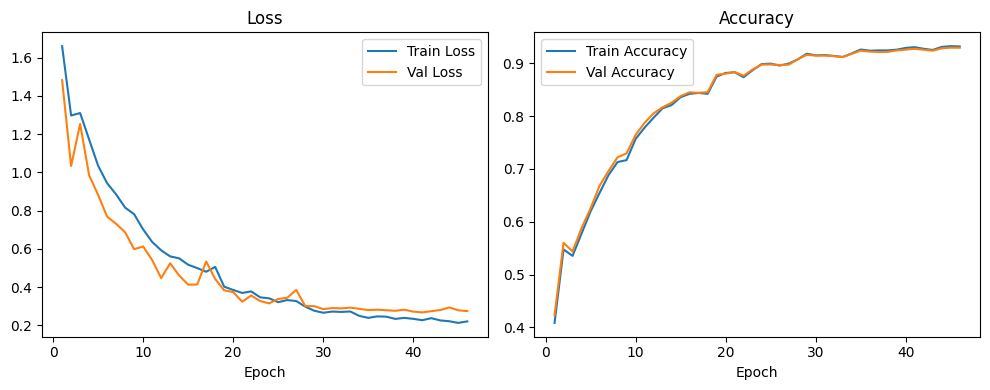

Accuracy: 0.9197

Classification Report:
                 precision    recall  f1-score   support

           corn     0.9600    0.9231    0.9412        52
         meadow     0.8578    0.9590    0.9056       195
  spring_barley     0.9571    0.9571    0.9571       210
        unknown     0.8506    0.6727    0.7513       110
  winter_barley     0.9677    0.9836    0.9756        61
winter_rapeseed     1.0000    1.0000    1.0000        60
     winter_rye     0.8525    0.8814    0.8667        59
   winter_wheat     0.9565    0.9506    0.9536       162

       accuracy                         0.9197       909
      macro avg     0.9253    0.9159    0.9189       909
   weighted avg     0.9197    0.9197    0.9178       909

Micro Avg  - Precision: 0.9197, Recall: 0.9197, F1: 0.9197
Weighted   - Precision: 0.9197, Recall: 0.9197, F1: 0.9178


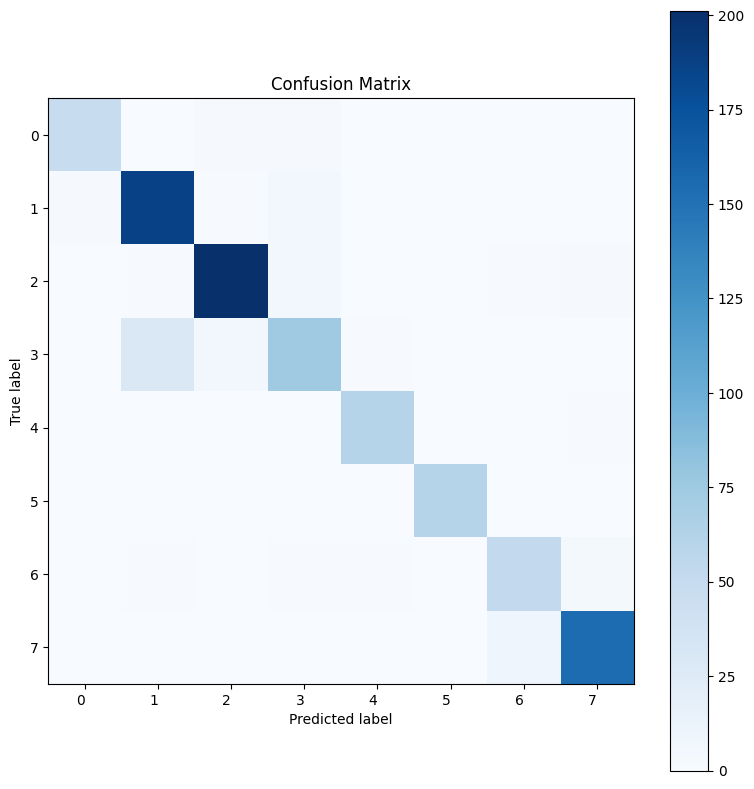

Epoch 1/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.32it/s]


Epoch 1/100: Train Loss=1.4804, Acc=0.5001, Prec=0.5001, Rec=0.5001, F1=0.5001 | Val Loss=1.0557, Acc=0.5236, Prec=0.5236, Rec=0.5236, F1=0.5236
New best loss: 1.0557


Epoch 2/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.28it/s]


Epoch 2/100: Train Loss=1.1516, Acc=0.5911, Prec=0.5911, Rec=0.5911, F1=0.5911 | Val Loss=0.9167, Acc=0.6044, Prec=0.6044, Rec=0.6044, F1=0.6044
New best loss: 0.9167


Epoch 3/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.36it/s]


Epoch 3/100: Train Loss=1.0099, Acc=0.6203, Prec=0.6203, Rec=0.6203, F1=0.6203 | Val Loss=0.8601, Acc=0.6357, Prec=0.6357, Rec=0.6357, F1=0.6357
New best loss: 0.8601


Epoch 4/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.27it/s]


Epoch 4/100: Train Loss=0.8260, Acc=0.6919, Prec=0.6919, Rec=0.6919, F1=0.6919 | Val Loss=0.6606, Acc=0.7081, Prec=0.7081, Rec=0.7081, F1=0.7081
New best loss: 0.6606


Epoch 5/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.38it/s]


Epoch 5/100: Train Loss=0.7957, Acc=0.7126, Prec=0.7126, Rec=0.7126, F1=0.7126 | Val Loss=0.5998, Acc=0.7282, Prec=0.7282, Rec=0.7282, F1=0.7282
New best loss: 0.5998


Epoch 6/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.32it/s]


Epoch 6/100: Train Loss=0.7279, Acc=0.7355, Prec=0.7355, Rec=0.7355, F1=0.7355 | Val Loss=0.5624, Acc=0.7496, Prec=0.7496, Rec=0.7496, F1=0.7496
New best loss: 0.5624


Epoch 7/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.31it/s]


Epoch 7/100: Train Loss=0.6611, Acc=0.7798, Prec=0.7798, Rec=0.7798, F1=0.7798 | Val Loss=0.4428, Acc=0.7939, Prec=0.7939, Rec=0.7939, F1=0.7939
New best loss: 0.4428


Epoch 8/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.35it/s]


Epoch 8/100: Train Loss=0.5571, Acc=0.8110, Prec=0.8110, Rec=0.8110, F1=0.8110 | Val Loss=0.4733, Acc=0.8144, Prec=0.8144, Rec=0.8144, F1=0.8144
 No improvement (1/5)


Epoch 9/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.32it/s]


Epoch 9/100: Train Loss=0.4798, Acc=0.8399, Prec=0.8399, Rec=0.8399, F1=0.8399 | Val Loss=0.3918, Acc=0.8425, Prec=0.8425, Rec=0.8425, F1=0.8425
New best loss: 0.3918


Epoch 10/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.30it/s]


Epoch 10/100: Train Loss=0.4697, Acc=0.8495, Prec=0.8495, Rec=0.8495, F1=0.8495 | Val Loss=0.4834, Acc=0.8500, Prec=0.8500, Rec=0.8500, F1=0.8500
 No improvement (1/5)


Epoch 11/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.36it/s]


Epoch 11/100: Train Loss=0.4598, Acc=0.8515, Prec=0.8515, Rec=0.8515, F1=0.8515 | Val Loss=0.4193, Acc=0.8530, Prec=0.8530, Rec=0.8530, F1=0.8530
 No improvement (2/5)


Epoch 12/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.30it/s]


Epoch 12/100: Train Loss=0.4553, Acc=0.8540, Prec=0.8540, Rec=0.8540, F1=0.8540 | Val Loss=0.3811, Acc=0.8586, Prec=0.8586, Rec=0.8586, F1=0.8586
New best loss: 0.3811


Epoch 13/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.38it/s]


Epoch 13/100: Train Loss=0.4252, Acc=0.8639, Prec=0.8639, Rec=0.8639, F1=0.8639 | Val Loss=0.6405, Acc=0.8458, Prec=0.8458, Rec=0.8458, F1=0.8458
 No improvement (1/5)


Epoch 14/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.30it/s]


Epoch 14/100: Train Loss=0.4838, Acc=0.8438, Prec=0.8438, Rec=0.8438, F1=0.8438 | Val Loss=0.2974, Acc=0.8544, Prec=0.8544, Rec=0.8544, F1=0.8544
New best loss: 0.2974


Epoch 15/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.30it/s]


Epoch 15/100: Train Loss=0.4059, Acc=0.8702, Prec=0.8702, Rec=0.8702, F1=0.8702 | Val Loss=0.3116, Acc=0.8753, Prec=0.8753, Rec=0.8753, F1=0.8753
 No improvement (1/5)


Epoch 16/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.33it/s]


Epoch 16/100: Train Loss=0.3820, Acc=0.8757, Prec=0.8757, Rec=0.8757, F1=0.8757 | Val Loss=0.3522, Acc=0.8784, Prec=0.8784, Rec=0.8784, F1=0.8784
 No improvement (2/5)


Epoch 17/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.36it/s]


Epoch 17/100: Train Loss=0.3852, Acc=0.8752, Prec=0.8752, Rec=0.8752, F1=0.8752 | Val Loss=0.2780, Acc=0.8815, Prec=0.8815, Rec=0.8815, F1=0.8815
New best loss: 0.2780


Epoch 18/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.37it/s]


Epoch 18/100: Train Loss=0.3460, Acc=0.8870, Prec=0.8870, Rec=0.8870, F1=0.8870 | Val Loss=0.3097, Acc=0.8890, Prec=0.8890, Rec=0.8890, F1=0.8890
 No improvement (1/5)


Epoch 19/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.25it/s]


Epoch 19/100: Train Loss=0.3821, Acc=0.8760, Prec=0.8760, Rec=0.8760, F1=0.8760 | Val Loss=0.3050, Acc=0.8800, Prec=0.8800, Rec=0.8800, F1=0.8800
 No improvement (2/5)


Epoch 20/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.34it/s]


Epoch 20/100: Train Loss=0.3712, Acc=0.8796, Prec=0.8796, Rec=0.8796, F1=0.8796 | Val Loss=0.3071, Acc=0.8839, Prec=0.8839, Rec=0.8839, F1=0.8839
 No improvement (3/5)


Epoch 21/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.33it/s]


Epoch 21/100: Train Loss=0.3064, Acc=0.9005, Prec=0.9005, Rec=0.9005, F1=0.9005 | Val Loss=0.2333, Acc=0.9053, Prec=0.9053, Rec=0.9053, F1=0.9053
New best loss: 0.2333


Epoch 22/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.29it/s]


Epoch 22/100: Train Loss=0.2582, Acc=0.9201, Prec=0.9201, Rec=0.9201, F1=0.9201 | Val Loss=0.2328, Acc=0.9217, Prec=0.9217, Rec=0.9217, F1=0.9217
 No improvement (1/5)


Epoch 23/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.31it/s]


Epoch 23/100: Train Loss=0.2737, Acc=0.9154, Prec=0.9154, Rec=0.9154, F1=0.9154 | Val Loss=0.2242, Acc=0.9175, Prec=0.9175, Rec=0.9175, F1=0.9175
New best loss: 0.2242


Epoch 24/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.32it/s]


Epoch 24/100: Train Loss=0.2590, Acc=0.9220, Prec=0.9220, Rec=0.9220, F1=0.9220 | Val Loss=0.2438, Acc=0.9201, Prec=0.9201, Rec=0.9201, F1=0.9201
 No improvement (1/5)


Epoch 25/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.32it/s]


Epoch 25/100: Train Loss=0.2646, Acc=0.9165, Prec=0.9165, Rec=0.9165, F1=0.9165 | Val Loss=0.2370, Acc=0.9166, Prec=0.9166, Rec=0.9166, F1=0.9166
 No improvement (2/5)


Epoch 26/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.30it/s]


Epoch 26/100: Train Loss=0.2732, Acc=0.9140, Prec=0.9140, Rec=0.9140, F1=0.9140 | Val Loss=0.2523, Acc=0.9139, Prec=0.9139, Rec=0.9139, F1=0.9139
 No improvement (3/5)


Epoch 27/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.36it/s]


Epoch 27/100: Train Loss=0.2384, Acc=0.9228, Prec=0.9228, Rec=0.9228, F1=0.9228 | Val Loss=0.2409, Acc=0.9210, Prec=0.9210, Rec=0.9210, F1=0.9210
 No improvement (4/5)


Epoch 28/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.30it/s]


Epoch 28/100: Train Loss=0.2293, Acc=0.9295, Prec=0.9295, Rec=0.9295, F1=0.9295 | Val Loss=0.2162, Acc=0.9301, Prec=0.9301, Rec=0.9301, F1=0.9301
New best loss: 0.2162


Epoch 29/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.33it/s]


Epoch 29/100: Train Loss=0.2142, Acc=0.9328, Prec=0.9328, Rec=0.9328, F1=0.9328 | Val Loss=0.2227, Acc=0.9320, Prec=0.9320, Rec=0.9320, F1=0.9320
 No improvement (1/5)


Epoch 30/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.33it/s]


Epoch 30/100: Train Loss=0.2086, Acc=0.9333, Prec=0.9333, Rec=0.9333, F1=0.9333 | Val Loss=0.2175, Acc=0.9325, Prec=0.9325, Rec=0.9325, F1=0.9325
 No improvement (2/5)


Epoch 31/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.38it/s]


Epoch 31/100: Train Loss=0.2070, Acc=0.9374, Prec=0.9374, Rec=0.9374, F1=0.9374 | Val Loss=0.2079, Acc=0.9369, Prec=0.9369, Rec=0.9369, F1=0.9369
New best loss: 0.2079


Epoch 32/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.32it/s]


Epoch 32/100: Train Loss=0.2079, Acc=0.9397, Prec=0.9397, Rec=0.9397, F1=0.9397 | Val Loss=0.2046, Acc=0.9380, Prec=0.9380, Rec=0.9380, F1=0.9380
New best loss: 0.2046


Epoch 33/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.34it/s]


Epoch 33/100: Train Loss=0.2057, Acc=0.9374, Prec=0.9374, Rec=0.9374, F1=0.9374 | Val Loss=0.2144, Acc=0.9369, Prec=0.9369, Rec=0.9369, F1=0.9369
 No improvement (1/5)


Epoch 34/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.32it/s]


Epoch 34/100: Train Loss=0.1956, Acc=0.9424, Prec=0.9424, Rec=0.9424, F1=0.9424 | Val Loss=0.1832, Acc=0.9422, Prec=0.9422, Rec=0.9422, F1=0.9422
New best loss: 0.1832


Epoch 35/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.22it/s]


Epoch 35/100: Train Loss=0.2017, Acc=0.9358, Prec=0.9358, Rec=0.9358, F1=0.9358 | Val Loss=0.2050, Acc=0.9371, Prec=0.9371, Rec=0.9371, F1=0.9371
 No improvement (1/5)


Epoch 36/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.32it/s]


Epoch 36/100: Train Loss=0.2075, Acc=0.9358, Prec=0.9358, Rec=0.9358, F1=0.9358 | Val Loss=0.1864, Acc=0.9369, Prec=0.9369, Rec=0.9369, F1=0.9369
 No improvement (2/5)


Epoch 37/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.34it/s]


Epoch 37/100: Train Loss=0.1891, Acc=0.9460, Prec=0.9460, Rec=0.9460, F1=0.9460 | Val Loss=0.1867, Acc=0.9459, Prec=0.9459, Rec=0.9459, F1=0.9459
 No improvement (3/5)


Epoch 38/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.22it/s]


Epoch 38/100: Train Loss=0.1704, Acc=0.9521, Prec=0.9521, Rec=0.9521, F1=0.9521 | Val Loss=0.1891, Acc=0.9501, Prec=0.9501, Rec=0.9501, F1=0.9501
 No improvement (4/5)


Epoch 39/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.37it/s]


Epoch 39/100: Train Loss=0.1825, Acc=0.9474, Prec=0.9474, Rec=0.9474, F1=0.9474 | Val Loss=0.1946, Acc=0.9455, Prec=0.9455, Rec=0.9455, F1=0.9455
 No improvement (5/5)
Early stopping triggered.


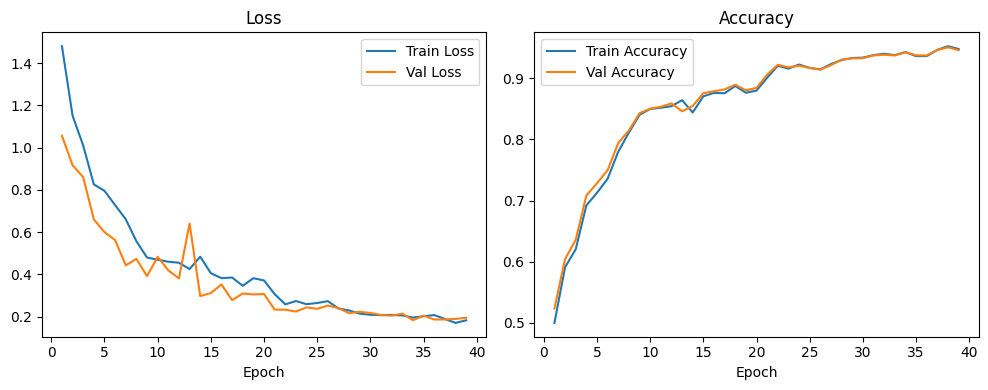

Accuracy: 0.9380

Classification Report:
                 precision    recall  f1-score   support

           corn     0.9804    1.0000    0.9901        50
         meadow     0.8458    0.9784    0.9073       185
  spring_barley     0.9491    0.9670    0.9579       212
        unknown     0.8868    0.5732    0.6963        82
  winter_barley     0.9839    0.9839    0.9839        62
winter_rapeseed     1.0000    0.9833    0.9916        60
     winter_rye     0.9636    0.9464    0.9550        56
   winter_wheat     0.9896    0.9745    0.9820       196

       accuracy                         0.9380       903
      macro avg     0.9499    0.9258    0.9330       903
   weighted avg     0.9395    0.9380    0.9346       903

Micro Avg  - Precision: 0.9380, Recall: 0.9380, F1: 0.9380
Weighted   - Precision: 0.9395, Recall: 0.9380, F1: 0.9346


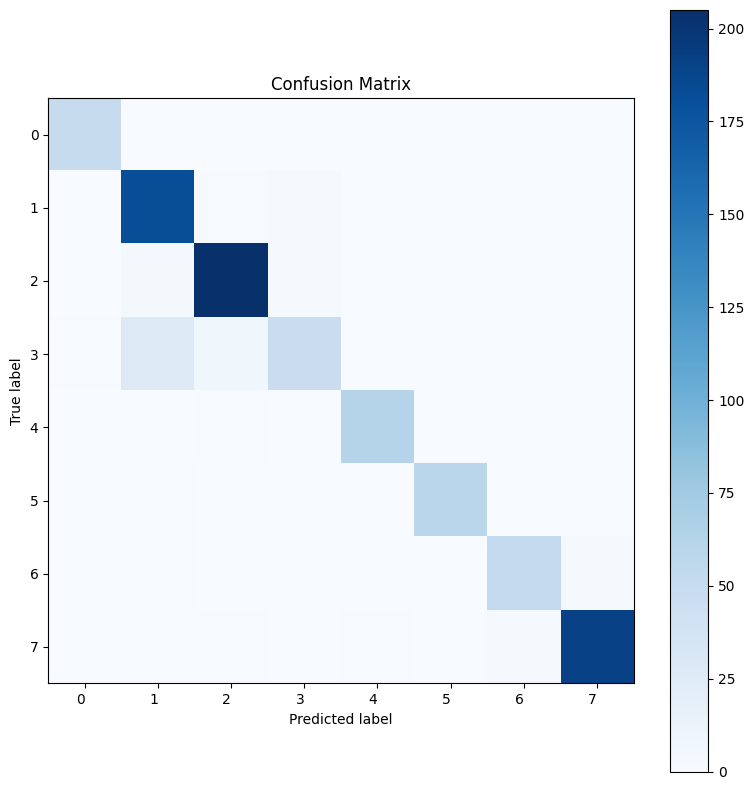

Epoch 1/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.69it/s]


Epoch 1/100: Train Loss=1.2820, Acc=0.5717, Prec=0.5717, Rec=0.5717, F1=0.5717 | Val Loss=1.0014, Acc=0.5821, Prec=0.5821, Rec=0.5821, F1=0.5821
New best loss: 1.0014


Epoch 2/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.71it/s]


Epoch 2/100: Train Loss=0.8797, Acc=0.6948, Prec=0.6948, Rec=0.6948, F1=0.6948 | Val Loss=0.7120, Acc=0.7103, Prec=0.7103, Rec=0.7103, F1=0.7103
New best loss: 0.7120


Epoch 3/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.73it/s]


Epoch 3/100: Train Loss=0.6730, Acc=0.7698, Prec=0.7698, Rec=0.7698, F1=0.7698 | Val Loss=0.6078, Acc=0.7725, Prec=0.7725, Rec=0.7725, F1=0.7725
New best loss: 0.6078


Epoch 4/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.80it/s]


Epoch 4/100: Train Loss=0.5730, Acc=0.8133, Prec=0.8133, Rec=0.8133, F1=0.8133 | Val Loss=0.5108, Acc=0.8180, Prec=0.8180, Rec=0.8180, F1=0.8180
New best loss: 0.5108


Epoch 5/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.76it/s]


Epoch 5/100: Train Loss=0.5450, Acc=0.8191, Prec=0.8191, Rec=0.8191, F1=0.8191 | Val Loss=0.5674, Acc=0.8182, Prec=0.8182, Rec=0.8182, F1=0.8182
 No improvement (1/5)


Epoch 6/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.71it/s]


Epoch 6/100: Train Loss=0.4977, Acc=0.8290, Prec=0.8290, Rec=0.8290, F1=0.8290 | Val Loss=0.4947, Acc=0.8347, Prec=0.8347, Rec=0.8347, F1=0.8347
New best loss: 0.4947


Epoch 7/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.77it/s]


Epoch 7/100: Train Loss=0.4690, Acc=0.8436, Prec=0.8436, Rec=0.8436, F1=0.8436 | Val Loss=0.4845, Acc=0.8482, Prec=0.8482, Rec=0.8482, F1=0.8482
New best loss: 0.4845


Epoch 8/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.71it/s]


Epoch 8/100: Train Loss=0.4515, Acc=0.8469, Prec=0.8469, Rec=0.8469, F1=0.8469 | Val Loss=0.5591, Acc=0.8442, Prec=0.8442, Rec=0.8442, F1=0.8442
 No improvement (1/5)


Epoch 9/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.78it/s]


Epoch 9/100: Train Loss=0.4089, Acc=0.8695, Prec=0.8695, Rec=0.8695, F1=0.8695 | Val Loss=0.4167, Acc=0.8720, Prec=0.8720, Rec=0.8720, F1=0.8720
New best loss: 0.4167


Epoch 10/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.81it/s]


Epoch 10/100: Train Loss=0.4313, Acc=0.8551, Prec=0.8551, Rec=0.8551, F1=0.8551 | Val Loss=0.5691, Acc=0.8500, Prec=0.8500, Rec=0.8500, F1=0.8500
 No improvement (1/5)


Epoch 11/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.78it/s]


Epoch 11/100: Train Loss=0.3946, Acc=0.8725, Prec=0.8725, Rec=0.8725, F1=0.8725 | Val Loss=0.4593, Acc=0.8703, Prec=0.8703, Rec=0.8703, F1=0.8703
 No improvement (2/5)


Epoch 12/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.71it/s]


Epoch 12/100: Train Loss=0.3899, Acc=0.8728, Prec=0.8728, Rec=0.8728, F1=0.8728 | Val Loss=0.3675, Acc=0.8775, Prec=0.8775, Rec=0.8775, F1=0.8775
New best loss: 0.3675


Epoch 13/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.76it/s]


Epoch 13/100: Train Loss=0.3668, Acc=0.8805, Prec=0.8805, Rec=0.8805, F1=0.8805 | Val Loss=0.4531, Acc=0.8780, Prec=0.8780, Rec=0.8780, F1=0.8780
 No improvement (1/5)


Epoch 14/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.71it/s]


Epoch 14/100: Train Loss=0.3581, Acc=0.8854, Prec=0.8854, Rec=0.8854, F1=0.8854 | Val Loss=0.3784, Acc=0.8877, Prec=0.8877, Rec=0.8877, F1=0.8877
 No improvement (2/5)


Epoch 15/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.73it/s]


Epoch 15/100: Train Loss=0.3318, Acc=0.8931, Prec=0.8931, Rec=0.8931, F1=0.8931 | Val Loss=0.3829, Acc=0.8954, Prec=0.8954, Rec=0.8954, F1=0.8954
 No improvement (3/5)


Epoch 16/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.73it/s]


Epoch 16/100: Train Loss=0.2713, Acc=0.9102, Prec=0.9102, Rec=0.9102, F1=0.9102 | Val Loss=0.3617, Acc=0.9095, Prec=0.9095, Rec=0.9095, F1=0.9095
New best loss: 0.3617


Epoch 17/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.75it/s]


Epoch 17/100: Train Loss=0.2627, Acc=0.9146, Prec=0.9146, Rec=0.9146, F1=0.9146 | Val Loss=0.3530, Acc=0.9128, Prec=0.9128, Rec=0.9128, F1=0.9128
New best loss: 0.3530


Epoch 18/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.75it/s]


Epoch 18/100: Train Loss=0.2549, Acc=0.9196, Prec=0.9196, Rec=0.9196, F1=0.9196 | Val Loss=0.3734, Acc=0.9166, Prec=0.9166, Rec=0.9166, F1=0.9166
 No improvement (1/5)


Epoch 19/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.72it/s]


Epoch 19/100: Train Loss=0.2403, Acc=0.9204, Prec=0.9204, Rec=0.9204, F1=0.9204 | Val Loss=0.3302, Acc=0.9195, Prec=0.9195, Rec=0.9195, F1=0.9195
New best loss: 0.3302


Epoch 20/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.71it/s]


Epoch 20/100: Train Loss=0.2484, Acc=0.9196, Prec=0.9196, Rec=0.9196, F1=0.9196 | Val Loss=0.3557, Acc=0.9181, Prec=0.9181, Rec=0.9181, F1=0.9181
 No improvement (1/5)


Epoch 21/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.69it/s]


Epoch 21/100: Train Loss=0.2460, Acc=0.9215, Prec=0.9215, Rec=0.9215, F1=0.9215 | Val Loss=0.3488, Acc=0.9201, Prec=0.9201, Rec=0.9201, F1=0.9201
 No improvement (2/5)


Epoch 22/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.71it/s]


Epoch 22/100: Train Loss=0.2485, Acc=0.9174, Prec=0.9174, Rec=0.9174, F1=0.9174 | Val Loss=0.3360, Acc=0.9192, Prec=0.9192, Rec=0.9192, F1=0.9192
 No improvement (3/5)


Epoch 23/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.76it/s]


Epoch 23/100: Train Loss=0.1991, Acc=0.9367, Prec=0.9367, Rec=0.9367, F1=0.9367 | Val Loss=0.3125, Acc=0.9340, Prec=0.9340, Rec=0.9340, F1=0.9340
New best loss: 0.3125


Epoch 24/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.65it/s]


Epoch 24/100: Train Loss=0.2007, Acc=0.9323, Prec=0.9323, Rec=0.9323, F1=0.9323 | Val Loss=0.3259, Acc=0.9312, Prec=0.9312, Rec=0.9312, F1=0.9312
 No improvement (1/5)


Epoch 25/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.79it/s]


Epoch 25/100: Train Loss=0.1843, Acc=0.9422, Prec=0.9422, Rec=0.9422, F1=0.9422 | Val Loss=0.3038, Acc=0.9398, Prec=0.9398, Rec=0.9398, F1=0.9398
New best loss: 0.3038


Epoch 26/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.69it/s]


Epoch 26/100: Train Loss=0.1953, Acc=0.9364, Prec=0.9364, Rec=0.9364, F1=0.9364 | Val Loss=0.3617, Acc=0.9345, Prec=0.9345, Rec=0.9345, F1=0.9345
 No improvement (1/5)


Epoch 27/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.79it/s]


Epoch 27/100: Train Loss=0.1872, Acc=0.9411, Prec=0.9411, Rec=0.9411, F1=0.9411 | Val Loss=0.3439, Acc=0.9378, Prec=0.9378, Rec=0.9378, F1=0.9378
 No improvement (2/5)


Epoch 28/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.66it/s]


Epoch 28/100: Train Loss=0.1936, Acc=0.9416, Prec=0.9416, Rec=0.9416, F1=0.9416 | Val Loss=0.3156, Acc=0.9387, Prec=0.9387, Rec=0.9387, F1=0.9387
 No improvement (3/5)


Epoch 29/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.78it/s]


Epoch 29/100: Train Loss=0.1775, Acc=0.9413, Prec=0.9413, Rec=0.9413, F1=0.9413 | Val Loss=0.3078, Acc=0.9389, Prec=0.9389, Rec=0.9389, F1=0.9389
 No improvement (4/5)


Epoch 30/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 11.73it/s]


Epoch 30/100: Train Loss=0.1609, Acc=0.9524, Prec=0.9524, Rec=0.9524, F1=0.9524 | Val Loss=0.3069, Acc=0.9484, Prec=0.9484, Rec=0.9484, F1=0.9484
 No improvement (5/5)
Early stopping triggered.


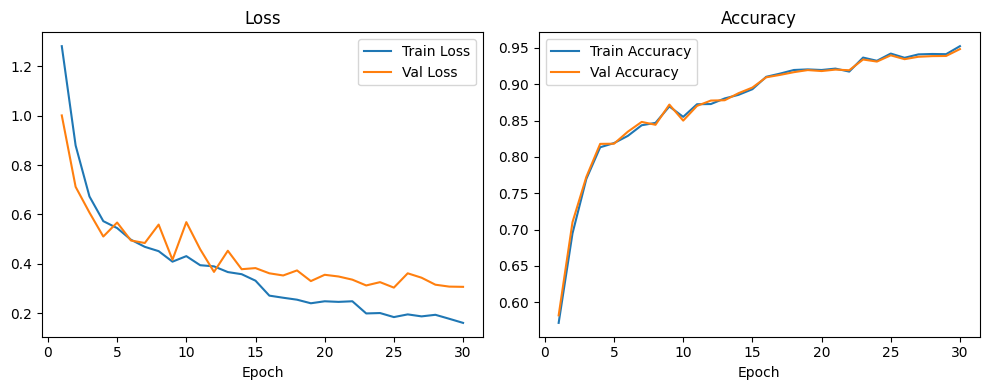

Accuracy: 0.9323

Classification Report:
                 precision    recall  f1-score   support

           corn     0.9839    0.9683    0.9760        63
         meadow     0.8617    0.9759    0.9153       166
  spring_barley     0.9565    0.9565    0.9565       207
        unknown     0.9176    0.7429    0.8211       105
  winter_barley     0.9870    0.9383    0.9620        81
winter_rapeseed     0.9821    0.9821    0.9821        56
     winter_rye     0.8493    0.9394    0.8921        66
   winter_wheat     0.9673    0.9427    0.9548       157

       accuracy                         0.9323       901
      macro avg     0.9382    0.9308    0.9325       901
   weighted avg     0.9348    0.9323    0.9316       901

Micro Avg  - Precision: 0.9323, Recall: 0.9323, F1: 0.9323
Weighted   - Precision: 0.9348, Recall: 0.9323, F1: 0.9316


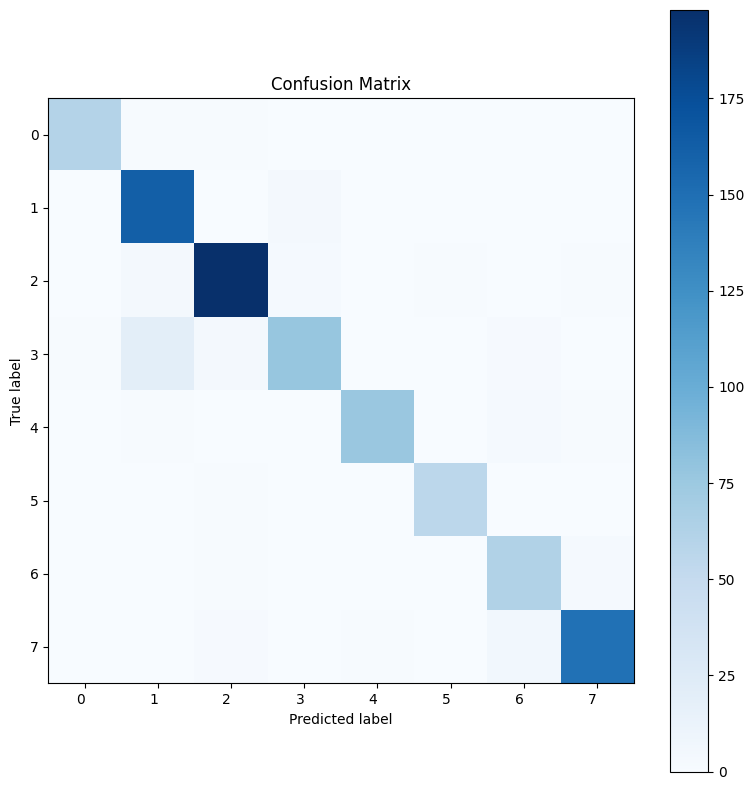

Epoch 1/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.24it/s]


Epoch 1/100: Train Loss=1.5359, Acc=0.4637, Prec=0.4637, Rec=0.4637, F1=0.4637 | Val Loss=1.2527, Acc=0.4841, Prec=0.4841, Rec=0.4841, F1=0.4841
New best loss: 1.2527


Epoch 2/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.33it/s]


Epoch 2/100: Train Loss=1.1263, Acc=0.5911, Prec=0.5911, Rec=0.5911, F1=0.5911 | Val Loss=0.9900, Acc=0.6017, Prec=0.6017, Rec=0.6017, F1=0.6017
New best loss: 0.9900


Epoch 3/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.26it/s]


Epoch 3/100: Train Loss=0.9454, Acc=0.6620, Prec=0.6620, Rec=0.6620, F1=0.6620 | Val Loss=0.8098, Acc=0.6792, Prec=0.6792, Rec=0.6792, F1=0.6792
New best loss: 0.8098


Epoch 4/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.27it/s]


Epoch 4/100: Train Loss=0.8747, Acc=0.6973, Prec=0.6973, Rec=0.6973, F1=0.6973 | Val Loss=0.7476, Acc=0.7065, Prec=0.7065, Rec=0.7065, F1=0.7065
New best loss: 0.7476


Epoch 5/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.32it/s]


Epoch 5/100: Train Loss=0.7197, Acc=0.7477, Prec=0.7477, Rec=0.7477, F1=0.7477 | Val Loss=0.6959, Acc=0.7485, Prec=0.7485, Rec=0.7485, F1=0.7485
New best loss: 0.6959


Epoch 6/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.21it/s]


Epoch 6/100: Train Loss=0.6670, Acc=0.7816, Prec=0.7816, Rec=0.7816, F1=0.7816 | Val Loss=0.5545, Acc=0.7888, Prec=0.7888, Rec=0.7888, F1=0.7888
New best loss: 0.5545


Epoch 7/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.25it/s]


Epoch 7/100: Train Loss=0.5687, Acc=0.8150, Prec=0.8150, Rec=0.8150, F1=0.8150 | Val Loss=0.4949, Acc=0.8204, Prec=0.8204, Rec=0.8204, F1=0.8204
New best loss: 0.4949


Epoch 8/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.26it/s]


Epoch 8/100: Train Loss=0.6116, Acc=0.8023, Prec=0.8023, Rec=0.8023, F1=0.8023 | Val Loss=0.5342, Acc=0.8089, Prec=0.8089, Rec=0.8089, F1=0.8089
 No improvement (1/5)


Epoch 9/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.29it/s]


Epoch 9/100: Train Loss=0.5178, Acc=0.8384, Prec=0.8384, Rec=0.8384, F1=0.8384 | Val Loss=0.4318, Acc=0.8464, Prec=0.8464, Rec=0.8464, F1=0.8464
New best loss: 0.4318


Epoch 10/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.25it/s]


Epoch 10/100: Train Loss=0.5254, Acc=0.8337, Prec=0.8337, Rec=0.8337, F1=0.8337 | Val Loss=0.4216, Acc=0.8416, Prec=0.8416, Rec=0.8416, F1=0.8416
New best loss: 0.4216


Epoch 11/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.25it/s]


Epoch 11/100: Train Loss=0.4766, Acc=0.8514, Prec=0.8514, Rec=0.8514, F1=0.8514 | Val Loss=0.3748, Acc=0.8566, Prec=0.8566, Rec=0.8566, F1=0.8566
New best loss: 0.3748


Epoch 12/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.97it/s]


Epoch 12/100: Train Loss=0.4333, Acc=0.8627, Prec=0.8627, Rec=0.8627, F1=0.8627 | Val Loss=0.4487, Acc=0.8634, Prec=0.8634, Rec=0.8634, F1=0.8634
 No improvement (1/5)


Epoch 13/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.08it/s]


Epoch 13/100: Train Loss=0.4316, Acc=0.8621, Prec=0.8621, Rec=0.8621, F1=0.8621 | Val Loss=0.3784, Acc=0.8665, Prec=0.8665, Rec=0.8665, F1=0.8665
 No improvement (2/5)


Epoch 14/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.24it/s]


Epoch 14/100: Train Loss=0.4297, Acc=0.8712, Prec=0.8712, Rec=0.8712, F1=0.8712 | Val Loss=0.3608, Acc=0.8762, Prec=0.8762, Rec=0.8762, F1=0.8762
New best loss: 0.3608


Epoch 15/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.15it/s]


Epoch 15/100: Train Loss=0.4252, Acc=0.8690, Prec=0.8690, Rec=0.8690, F1=0.8690 | Val Loss=0.3131, Acc=0.8758, Prec=0.8758, Rec=0.8758, F1=0.8758
New best loss: 0.3131


Epoch 16/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.31it/s]


Epoch 16/100: Train Loss=0.3877, Acc=0.8779, Prec=0.8779, Rec=0.8779, F1=0.8779 | Val Loss=0.3181, Acc=0.8833, Prec=0.8833, Rec=0.8833, F1=0.8833
 No improvement (1/5)


Epoch 17/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.13it/s]


Epoch 17/100: Train Loss=0.3859, Acc=0.8748, Prec=0.8748, Rec=0.8748, F1=0.8748 | Val Loss=0.3819, Acc=0.8747, Prec=0.8747, Rec=0.8747, F1=0.8747
 No improvement (2/5)


Epoch 18/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.00it/s]


Epoch 18/100: Train Loss=0.4211, Acc=0.8699, Prec=0.8699, Rec=0.8699, F1=0.8699 | Val Loss=0.3592, Acc=0.8738, Prec=0.8738, Rec=0.8738, F1=0.8738
 No improvement (3/5)


Epoch 19/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.07it/s]


Epoch 19/100: Train Loss=0.3225, Acc=0.9030, Prec=0.9030, Rec=0.9030, F1=0.9030 | Val Loss=0.2947, Acc=0.9056, Prec=0.9056, Rec=0.9056, F1=0.9056
New best loss: 0.2947


Epoch 20/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.14it/s]


Epoch 20/100: Train Loss=0.2973, Acc=0.9109, Prec=0.9109, Rec=0.9109, F1=0.9109 | Val Loss=0.3096, Acc=0.9093, Prec=0.9093, Rec=0.9093, F1=0.9093
 No improvement (1/5)


Epoch 21/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.17it/s]


Epoch 21/100: Train Loss=0.2936, Acc=0.9118, Prec=0.9118, Rec=0.9118, F1=0.9118 | Val Loss=0.3004, Acc=0.9109, Prec=0.9109, Rec=0.9109, F1=0.9109
 No improvement (2/5)


Epoch 22/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.16it/s]


Epoch 22/100: Train Loss=0.2856, Acc=0.9109, Prec=0.9109, Rec=0.9109, F1=0.9109 | Val Loss=0.2835, Acc=0.9124, Prec=0.9124, Rec=0.9124, F1=0.9124
New best loss: 0.2835


Epoch 23/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.11it/s]


Epoch 23/100: Train Loss=0.2708, Acc=0.9176, Prec=0.9176, Rec=0.9176, F1=0.9176 | Val Loss=0.2917, Acc=0.9175, Prec=0.9175, Rec=0.9175, F1=0.9175
 No improvement (1/5)


Epoch 24/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.14it/s]


Epoch 24/100: Train Loss=0.2790, Acc=0.9151, Prec=0.9151, Rec=0.9151, F1=0.9151 | Val Loss=0.2978, Acc=0.9139, Prec=0.9139, Rec=0.9139, F1=0.9139
 No improvement (2/5)


Epoch 25/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.29it/s]


Epoch 25/100: Train Loss=0.2758, Acc=0.9118, Prec=0.9118, Rec=0.9118, F1=0.9118 | Val Loss=0.2860, Acc=0.9124, Prec=0.9124, Rec=0.9124, F1=0.9124
 No improvement (3/5)


Epoch 26/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.21it/s]


Epoch 26/100: Train Loss=0.2412, Acc=0.9283, Prec=0.9283, Rec=0.9283, F1=0.9283 | Val Loss=0.2754, Acc=0.9274, Prec=0.9274, Rec=0.9274, F1=0.9274
New best loss: 0.2754


Epoch 27/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.32it/s]


Epoch 27/100: Train Loss=0.2303, Acc=0.9283, Prec=0.9283, Rec=0.9283, F1=0.9283 | Val Loss=0.2846, Acc=0.9245, Prec=0.9245, Rec=0.9245, F1=0.9245
 No improvement (1/5)


Epoch 28/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.32it/s]


Epoch 28/100: Train Loss=0.2332, Acc=0.9305, Prec=0.9305, Rec=0.9305, F1=0.9305 | Val Loss=0.2661, Acc=0.9307, Prec=0.9307, Rec=0.9307, F1=0.9307
New best loss: 0.2661


Epoch 29/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.28it/s]


Epoch 29/100: Train Loss=0.2341, Acc=0.9302, Prec=0.9302, Rec=0.9302, F1=0.9302 | Val Loss=0.2775, Acc=0.9289, Prec=0.9289, Rec=0.9289, F1=0.9289
 No improvement (1/5)


Epoch 30/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 12.91it/s]


Epoch 30/100: Train Loss=0.2206, Acc=0.9347, Prec=0.9347, Rec=0.9347, F1=0.9347 | Val Loss=0.2811, Acc=0.9325, Prec=0.9325, Rec=0.9325, F1=0.9325
 No improvement (2/5)


Epoch 31/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.21it/s]


Epoch 31/100: Train Loss=0.2095, Acc=0.9374, Prec=0.9374, Rec=0.9374, F1=0.9374 | Val Loss=0.2819, Acc=0.9342, Prec=0.9342, Rec=0.9342, F1=0.9342
 No improvement (3/5)


Epoch 32/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.21it/s]


Epoch 32/100: Train Loss=0.2051, Acc=0.9349, Prec=0.9349, Rec=0.9349, F1=0.9349 | Val Loss=0.2612, Acc=0.9340, Prec=0.9340, Rec=0.9340, F1=0.9340
New best loss: 0.2612


Epoch 33/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.17it/s]


Epoch 33/100: Train Loss=0.2025, Acc=0.9374, Prec=0.9374, Rec=0.9374, F1=0.9374 | Val Loss=0.2620, Acc=0.9351, Prec=0.9351, Rec=0.9351, F1=0.9351
 No improvement (1/5)


Epoch 34/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.18it/s]


Epoch 34/100: Train Loss=0.2031, Acc=0.9369, Prec=0.9369, Rec=0.9369, F1=0.9369 | Val Loss=0.2658, Acc=0.9342, Prec=0.9342, Rec=0.9342, F1=0.9342
 No improvement (2/5)


Epoch 35/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.26it/s]


Epoch 35/100: Train Loss=0.1948, Acc=0.9382, Prec=0.9382, Rec=0.9382, F1=0.9382 | Val Loss=0.2613, Acc=0.9365, Prec=0.9365, Rec=0.9365, F1=0.9365
 No improvement (3/5)


Epoch 36/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.17it/s]


Epoch 36/100: Train Loss=0.1905, Acc=0.9413, Prec=0.9413, Rec=0.9413, F1=0.9413 | Val Loss=0.2696, Acc=0.9389, Prec=0.9389, Rec=0.9389, F1=0.9389
 No improvement (4/5)


Epoch 37/100 [Val]: 100%|██████████| 57/57 [00:04<00:00, 13.04it/s]


Epoch 37/100: Train Loss=0.1943, Acc=0.9410, Prec=0.9410, Rec=0.9410, F1=0.9410 | Val Loss=0.2682, Acc=0.9384, Prec=0.9384, Rec=0.9384, F1=0.9384
 No improvement (5/5)
Early stopping triggered.


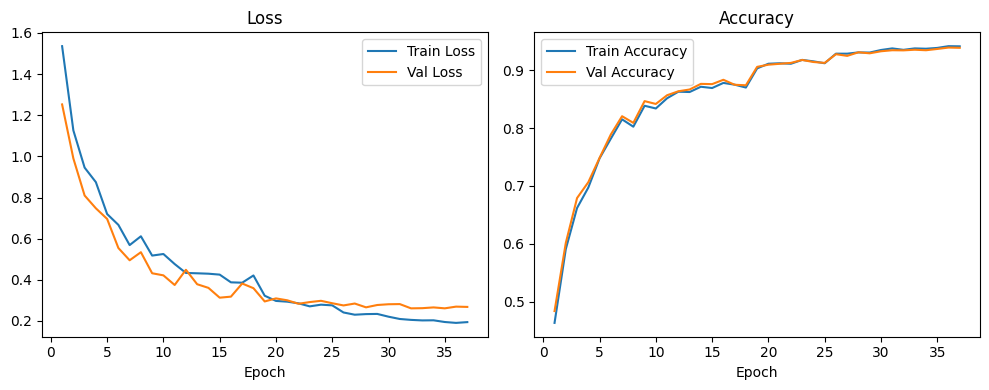

Accuracy: 0.9282

Classification Report:
                 precision    recall  f1-score   support

           corn     0.9815    0.9636    0.9725        55
         meadow     0.8552    0.9310    0.8915       203
  spring_barley     0.9452    0.9452    0.9452       219
        unknown     0.8375    0.6979    0.7614        96
  winter_barley     0.9833    0.9516    0.9672        62
winter_rapeseed     0.9836    1.0000    0.9917        60
     winter_rye     0.9194    1.0000    0.9580        57
   winter_wheat     1.0000    0.9673    0.9834       153

       accuracy                         0.9282       905
      macro avg     0.9382    0.9321    0.9339       905
   weighted avg     0.9286    0.9282    0.9272       905

Micro Avg  - Precision: 0.9282, Recall: 0.9282, F1: 0.9282
Weighted   - Precision: 0.9286, Recall: 0.9282, F1: 0.9272


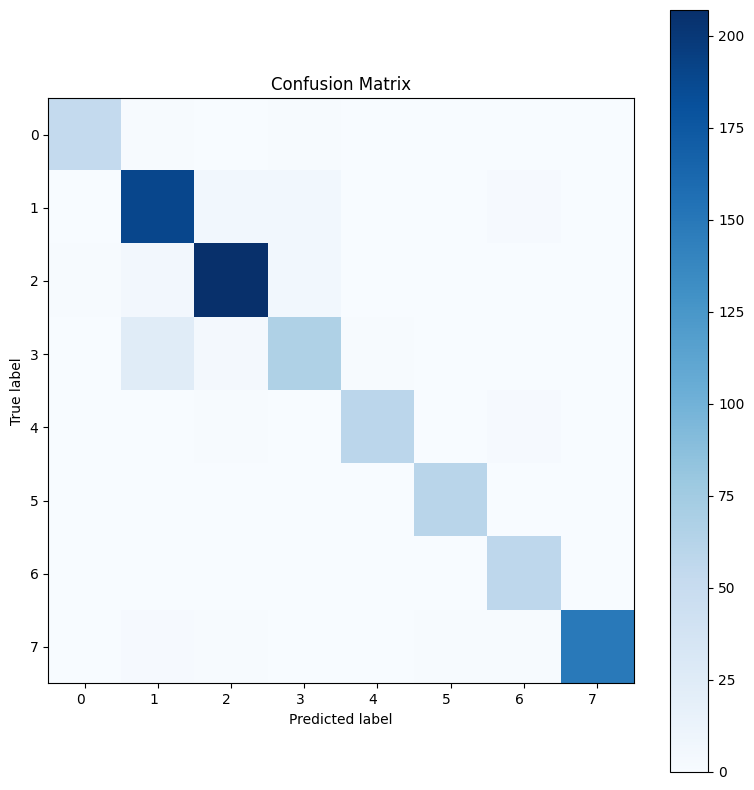

In [6]:
from models.pse import PixelSetEncoder
from models.tranformer_model import TransformerWithCLS

folds = transforms.compute_kfold_splits(dataset, k=5)
results = []
fold_dir = f"/home/ubuntu/bdeo_exercise_2/output_cross_entropy_model"
os.makedirs(fold_dir, exist_ok=True)
for fold_idx, (train_idx, val_idx, mean, std) in enumerate(folds):
  

    train_transform = transforms.Compose(
        [
            transforms.RandomSampleTimeSteps(seq_length=52),
            transforms.RandomSamplePixels(num_pixels=32),
            transforms.Normalize(mean, std),
            transforms.ToTensor(),
          
        ]
    )

    val_tranform=transforms.Compose(
        [
        
            transforms.Normalize(mean, std),
            transforms.ToTensor(),
           
        ]
    )

    train_dataset = data_loader.PixelSetData(
        dataset_folder="/home/ubuntu/bdeo_exercise_2/dataset/timematch_data/denmark/32VNH/2017",
        transform=train_transform,
        indices=train_idx,
        min_sample=200,
       
    )

    val_dataset = data_loader.PixelSetData(
        dataset_folder="/home/ubuntu/bdeo_exercise_2/dataset/timematch_data/denmark/32VNH/2017",
        transform=val_tranform,
        indices=val_idx,
        min_sample=200,
      
    )

    ds_train = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=data_loader.padded_collate_fn)
    ds_valid = DataLoader(val_dataset, batch_size=16,collate_fn=data_loader.padded_collate_fn)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    encoder = PixelSetEncoder(
        input_dim=10,
        mlp1=[10, 32, 64],
        pooling='mean_std',
        mlp2=[128, 128],
        with_extra=False,

    ).to(device)

    transformer = TransformerWithCLS(
        input_dim=128,     # Must match the output_dim of PixelSetEncoder (e.g., 128)
        num_classes=8,
        dates_json_path="/home/ubuntu/bdeo_exercise_2/dataset/timematch_data/denmark/32VNH/2017/meta/dates.json",
        nhead=4,     # Set this to your actual number of classes (e.g., crop types)          # Number of attention heads in Transformer
        num_layers=2,      # Number of Transformer encoder layers
        dropout=0.1        # Dropout for regularization
    )

    # Wrap them together
    model = train.FullModel(pse=encoder, transformer=transformer).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    scheduler = ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.5,
        patience=2,
    )

    save_path = os.path.join(fold_dir, f"cross_entropy_fold{fold_idx}.pt")

    train_losses, val_losses,train_accs, val_accs, train_precs, val_precs, train_recs, val_recs,train_f1s, val_f1s, train_prec_w, val_prec_w,train_rec_w, val_rec_w,train_f1_w, val_f1_w=train.train_model(
        model=model,
        train_loader=ds_train,
        val_loader=ds_valid,
        criterion=criterion,
        optimizer=optimizer,
        scheduler=scheduler,
        num_epochs=100,
        save_name=save_path
    )
    results.append({
    "fold":      fold_idx,
    "precision_micro": val_precs[-1],
    "recall_micro":    val_recs[-1],
    "f1_micro":        val_f1s[-1],
    "accuracy":  val_accs[-1],
    "precision_weighted": val_prec_w[-1],
    "recall_weighted":    val_rec_w[-1],
    "f1_weighted":       val_f1_w[-1],
    })
    #Evaluate
    train.plot_history(train_losses, val_losses,train_accs, val_accs)
    metrics=train.evaluate_classification(model,ds_valid,class_names=class_names)

In [8]:
precision_micro = [r['precision_micro'] for r in results]
recalls_micro    = [r['recall_micro'] for r in results]
f1s_micro        = [r['f1_micro']  for r in results]
precision_weight= [r['precision_weighted'] for r in results]
recalls_wighted   = [r['recall_weighted'] for r in results]
f1s_weighted      = [r['f1_weighted']  for r in results]
accs       = [r['accuracy']  for r in results]

print("precision_micro – mean:", np.mean(precision_micro), " std:", np.std(precision_micro))
print("Recall_micro    – mean:", np.mean(recalls_micro),    " std:", np.std(recalls_micro))
print("F1-score_micro  – mean:", np.mean(f1s_micro),        " std:", np.std(f1s_micro))

print("precision_weight – mean:", np.mean(precision_weight), " std:", np.std(precision_weight))
print("recalls_wighted    – mean:", np.mean(recalls_wighted),    " std:", np.std(recalls_wighted))
print("F1-score_weighted  – mean:", np.mean(f1s_weighted),        " std:", np.std(f1s_weighted))
print("Accuracy  – mean:", np.mean(accs),       " std:", np.std(accs))

precision_micro – mean: 0.9403353929519653  std: 0.006482264129681661
Recall_micro    – mean: 0.9403353929519653  std: 0.006482264129681661
F1-score_micro  – mean: 0.9403353929519653  std: 0.006482264129681661
precision_weight – mean: 0.9406122922897339  std: 0.00661488146920253
recalls_wighted    – mean: 0.9403353691101074  std: 0.006482274355459876
F1-score_weighted  – mean: 0.93962482213974  std: 0.006635707686019005
Accuracy  – mean: 0.9403353929519653  std: 0.006482264129681661
